# Neural Network from Scratch

This notebook implements a simple neural network for digit classification using only NumPy. Below is a detailed explanation of the steps involved.

## Data Preprocessing
### Explanation
1. Load the MNIST dataset.
2. Normalize pixel values to range `[0, 1]`.
3. Split the dataset into training and development sets.

### Code:

In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [24]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

## Neural Network Implementation
### Explanation
The network consists of an input layer, one hidden layer with ReLU activation, and an output layer with softmax activation.
1. Perform forward propagation to compute predictions.
2. Compute loss and perform backward propagation to update weights and biases.


### Code:


In [25]:

def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [26]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [28]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[9 6 7 ... 9 0 7] [5 1 0 ... 1 5 6]
0.10709756097560975
Iteration:  10
[8 1 7 ... 1 3 7] [5 1 0 ... 1 5 6]
0.16351219512195123
Iteration:  20
[8 1 0 ... 1 3 6] [5 1 0 ... 1 5 6]
0.23553658536585365
Iteration:  30
[9 1 0 ... 1 3 6] [5 1 0 ... 1 5 6]
0.3220487804878049
Iteration:  40
[9 1 0 ... 1 3 6] [5 1 0 ... 1 5 6]
0.38085365853658537
Iteration:  50
[9 1 0 ... 1 3 6] [5 1 0 ... 1 5 6]
0.4448780487804878
Iteration:  60
[4 1 0 ... 1 3 6] [5 1 0 ... 1 5 6]
0.5076341463414634
Iteration:  70
[4 1 0 ... 1 3 6] [5 1 0 ... 1 5 6]
0.5593170731707318
Iteration:  80
[4 1 0 ... 1 3 6] [5 1 0 ... 1 5 6]
0.6009756097560975
Iteration:  90
[4 1 0 ... 1 3 6] [5 1 0 ... 1 5 6]
0.631390243902439
Iteration:  100
[4 1 0 ... 1 5 6] [5 1 0 ... 1 5 6]
0.658
Iteration:  110
[4 1 0 ... 1 5 6] [5 1 0 ... 1 5 6]
0.6797804878048781
Iteration:  120
[4 1 0 ... 1 5 6] [5 1 0 ... 1 5 6]
0.6959512195121951
Iteration:  130
[4 1 0 ... 1 5 6] [5 1 0 ... 1 5 6]
0.7102439024390244
Iteration:  140
[4 1 0 ... 

## Model Evaluation and Visualization
### Explanation
Evaluate the model's performance and visualize the training process.

### Code:

In [29]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Prediction:  [1]
Label:  1


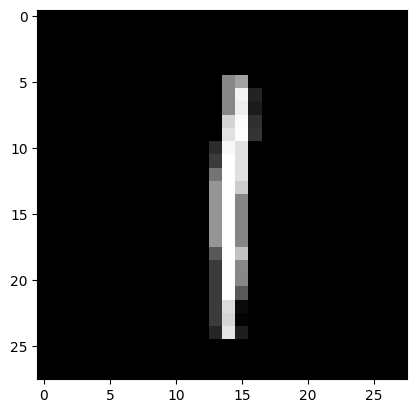

Prediction:  [0]
Label:  0


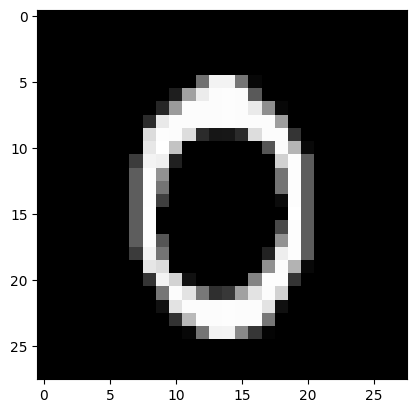

Prediction:  [6]
Label:  6


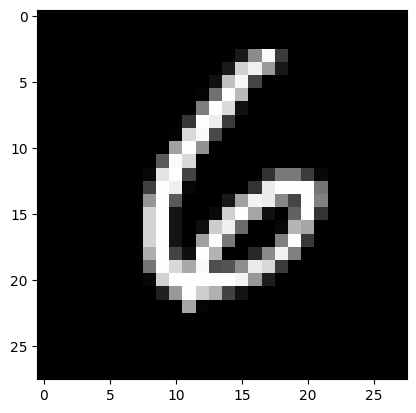

Prediction:  [2]
Label:  2


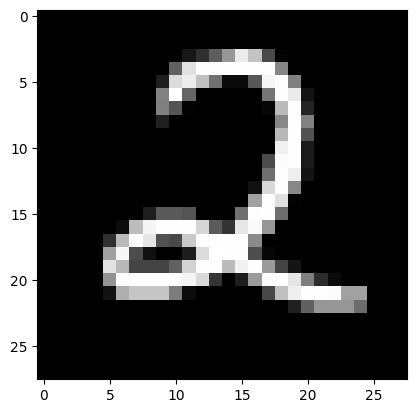

Prediction:  [8]
Label:  8


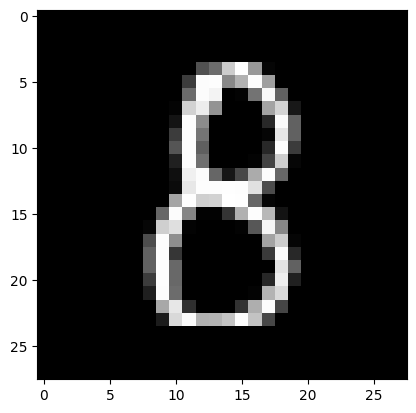

Prediction:  [8]
Label:  8


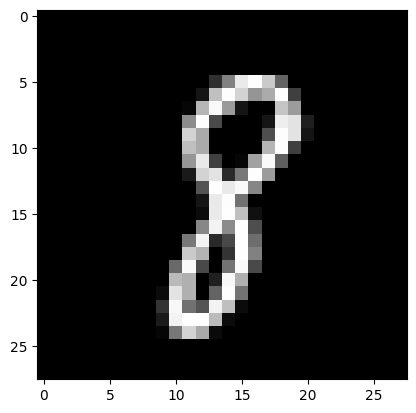

Prediction:  [2]
Label:  2


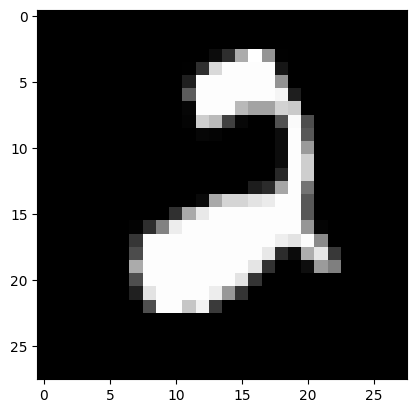

Prediction:  [8]
Label:  8


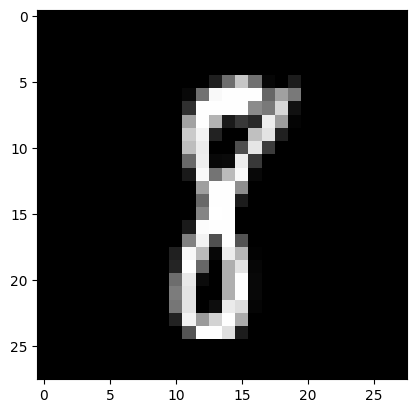

Prediction:  [4]
Label:  4


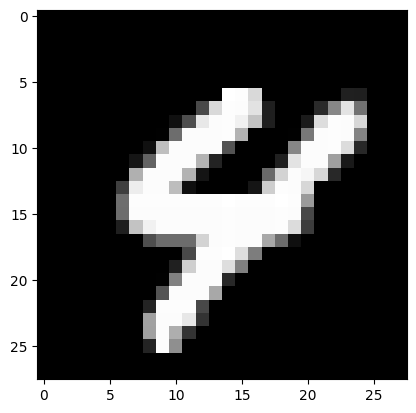

Prediction:  [4]
Label:  4


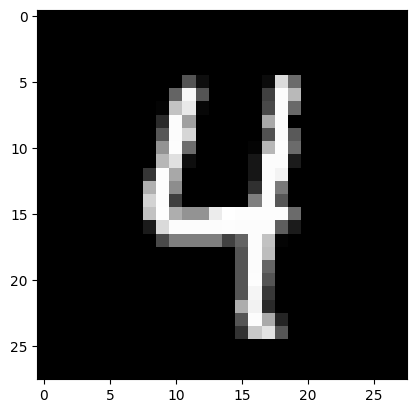

Prediction:  [5]
Label:  5


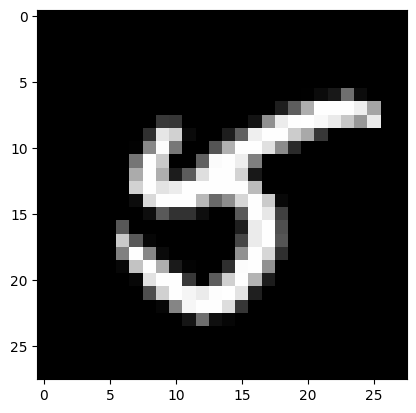

Prediction:  [4]
Label:  4


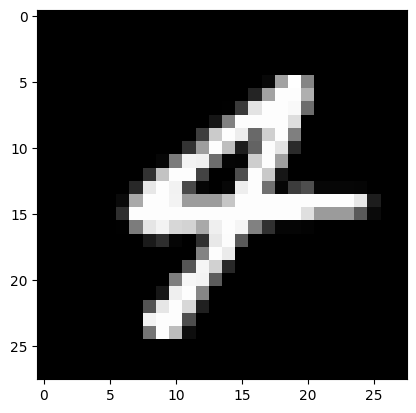

In [33]:
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
test_prediction(4, W1, b1, W2, b2)
test_prediction(5, W1, b1, W2, b2)
test_prediction(6, W1, b1, W2, b2)
test_prediction(7, W1, b1, W2, b2)
test_prediction(8, W1, b1, W2, b2)
test_prediction(9, W1, b1, W2, b2)
test_prediction(10, W1, b1, W2, b2)
test_prediction(11, W1, b1, W2, b2)
test_prediction(12, W1, b1, W2, b2)

In [34]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[3 9 3 3 7 3 1 2 3 2 9 2 4 7 4 3 1 7 1 6 8 8 4 7 4 6 5 1 3 7 9 9 3 1 2 2 5
 4 5 2 6 9 1 7 1 1 5 4 6 8 2 1 9 4 1 5 6 2 4 6 2 6 7 2 0 3 3 1 6 4 7 1 8 3
 3 4 9 0 6 9 0 3 5 9 3 0 4 6 4 7 1 6 2 2 6 7 3 2 4 8 3 6 9 3 9 3 9 4 9 9 4
 2 9 1 3 4 1 6 4 1 7 8 2 4 1 5 2 3 3 4 4 6 2 5 7 8 7 8 9 6 6 1 9 2 4 7 7 6
 0 0 0 4 9 9 3 9 3 3 0 5 3 4 5 7 4 6 7 1 9 6 1 6 5 3 2 6 9 1 1 1 2 7 4 5 4
 2 9 2 1 4 2 5 7 0 4 1 7 9 7 4 2 4 8 4 3 6 0 2 1 0 4 4 0 1 1 2 7 1 4 0 7 0
 8 3 2 3 3 6 1 5 1 0 1 0 2 4 1 4 3 0 9 1 6 0 8 8 4 6 5 7 0 2 3 5 0 9 8 0 1
 4 3 2 2 3 1 5 7 8 9 4 5 0 6 4 6 0 4 7 0 5 3 8 3 6 0 2 0 7 9 6 7 2 2 0 4 0
 3 3 4 0 7 7 8 3 0 1 3 7 6 2 5 5 5 9 4 7 5 3 2 0 2 6 7 3 1 0 0 0 9 6 3 5 2
 4 0 3 6 6 2 1 7 3 8 3 6 2 4 9 1 4 4 9 1 9 8 8 9 7 2 0 5 0 1 4 2 5 3 8 9 5
 0 8 3 2 2 3 3 4 0 2 8 5 7 7 0 6 0 1 8 2 3 5 6 0 2 5 6 8 2 0 9 7 6 6 1 4 9
 1 5 8 7 4 8 6 5 8 7 3 7 4 4 6 4 0 9 8 1 9 6 0 4 3 3 5 3 8 7 3 2 0 0 3 9 8
 4 8 3 0 0 7 2 7 6 4 3 6 0 2 9 3 6 9 1 1 1 0 8 7 1 6 9 0 1 2 2 2 4 3 2 0 9
 9 0 0 8 9 7 8 1 1 0 1 7 

0.863